# 什么是核函数

SVM本质是一个最优化问题，我们需要把它转化为一个更好解的形式

由

$$min\frac{1}{2}||w||^2 + C \sum_{i=1}^m \zeta_i$$

$$s.t. \quad y^{(i)}(w^Tx^{(i)} + b) \geq 1 - \zeta_i \qquad \zeta_i \geq 0$$

转换为

$$max\sum_{i=1}^m\alpha_i - \frac{1}{2}\sum_{i=1}^m\sum_{j=1}^m \alpha_i \alpha_j y_i y_j x_i x_j$$

$$s.t. \quad 0 \leq \alpha_i \leq C \qquad \sum_{i=1}^m \alpha_i y_i = 0$$

**核函数**

对于使用新的特征（比方说多项式），我们之前都是先将式子中的特征$x_i$和$x_j$变换为新特征$x_i^{'}$和$x_j^{'}$，然后进行运算

如果不先分别处理式子中$x_i$和$x_j$，然后进行运算，而是直接有一个函数$K(x_i, x_j) = x_i^{'}x_j^{'}$

$$max\sum_{i=1}^m\alpha_i - \frac{1}{2}\sum_{i=1}^m\sum_{j=1}^m \alpha_i \alpha_j y_i y_j K(x_i, x_j)$$

$$s.t. \quad 0 \leq \alpha_i \leq C \qquad \sum_{i=1}^m \alpha_i y_i = 0$$

那我们称$K(x_i, x_j)$为核函数

优点：

- 减少了计算量
- 减少了存储空间

## 多项式核函数

### 二次

$$K(x, y) = (x \cdot y + 1)^2$$

如果不使用核函数

$$K(x, y) = (\sum_{i=1}^m x_i y_i + 1)^2$$

$$K(x, y) = \sum_{i=1}^n(x_i^2)(y_i^2) + \sum_{i=2}^n\sum_{j=1}^{i-1}(\sqrt 2 x_i x_j)(\sqrt 2 y_i y_j) + \sum_{i=1}^n(\sqrt 2 x_i)(\sqrt 2 y_i) + 1 = x^{'} \cdot y^{'}$$

$$x^{'}=(x_n^2, \ldots, x_1^2, \sqrt 2 x_n x_{n-1}, \ldots, \sqrt 2 x_n, \dots, \sqrt 2 x_1, 1)$$

$y^{'}$也是，类似的形式，先计算出$x^{'}$和$y^{'}$，再运算点乘，很麻烦

### 多次

$$K(x, y) = (x \cdot y + c)^d$$

## 线性核函数

$$K(x, y) = x \cdot y$$

## 高斯核函数

使用很多，可以看做正态分布的一种表达方式

由高斯函数

$$g(x) = \frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{1}{2}(\frac{\, x-\mu \;}{\sigma})^2}$$

变化而来

高斯核函数

$$K(x, y) = e^{-\gamma ||x-y||^2}$$

有时候也被成为 **RBF核 Radial Basis Function Kernel（径向基函数核）**

本质：升维，将每一个样本点映射到一个无穷维的特征空间

**依靠升维可以使得原本线性不可分的数据线性可分**

### 直观理解高斯核函数

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.arange(-4, 5, 1)
x

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [3]:
y = np.array((x >= -2) & (x <= 2), dtype=int)
y

array([0, 0, 1, 1, 1, 1, 1, 0, 0])

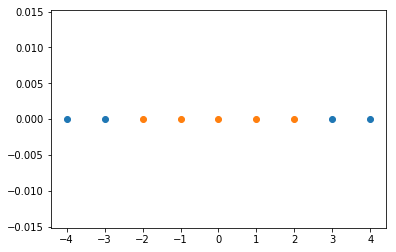

In [4]:
plt.scatter(x[y==0], [0] * len(x[y==0]))
plt.scatter(x[y==1], [0] * len(x[y==1]))
plt.show()

可以看到是个线性不可分的数据

In [5]:
def gaussian(x, l):
    gamma = 1.0
    return np.exp(-gamma * (x-l)**2)

In [6]:
l1,l2 = -1,1

X_new = np.empty((len(x), 2))
for i, data in enumerate(x):
    X_new[i, 0] = gaussian(data, l1)
    X_new[i, 1] = gaussian(data, l2)

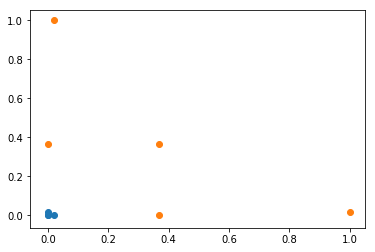

In [7]:
plt.scatter(X_new[y==0,0], X_new[y==0,1])
plt.scatter(X_new[y==1,0], X_new[y==1,1])
plt.show()

经过高斯核函数，变成线性可分的问题了

### landmark

上述两个点l1， l2， 称为两个landmark

高斯核：对于每个数据点都是landmark

m * n 的数据映射称为 m * m 的数据

计算开销非常大，但是有些应用非常适合高斯核函数，比方说，初始维度很高，但是样本数不多，尤其是 n > m 的时候。比方说自然语言处理非常适合高斯核。

### gamma

gamma越大，高斯分布越窄；
gamma越小，高斯分布越宽。

### scikit-learn 中的高斯核函数

In [8]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100 )).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100 )).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    custom_camp = ListedColormap(['#EF9A9A', '#FFF59F', '#90CAF9'])
    plt.contourf(x0, x1, zz, cmap=custom_camp)

In [9]:
from sklearn import datasets

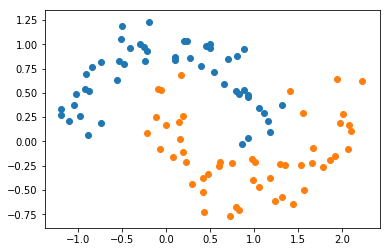

In [10]:
X, y = datasets.make_moons(noise=0.15, random_state=666)

plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [12]:
def RBFKerbelSVC(gamma=1.0):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("svc", SVC(kernel="rbf", gamma=gamma))
    ])

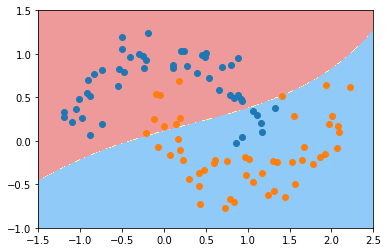

In [13]:
svc_gamma01 = RBFKerbelSVC(0.1)
svc_gamma01.fit(X, y)

plot_decision_boundary(svc_gamma01, [-1.5,2.5,-1,1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

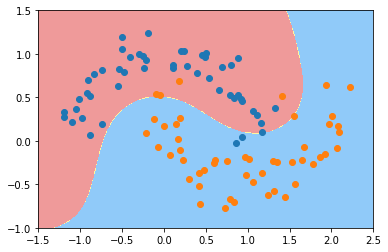

In [14]:
svc_gamma05 = RBFKerbelSVC(0.5)
svc_gamma05.fit(X, y)

plot_decision_boundary(svc_gamma05, [-1.5,2.5,-1,1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

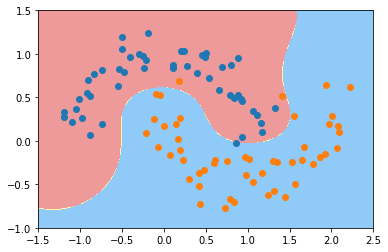

In [15]:
svc_gamma1 = RBFKerbelSVC(1)
svc_gamma1.fit(X, y)

plot_decision_boundary(svc_gamma1, [-1.5,2.5,-1,1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

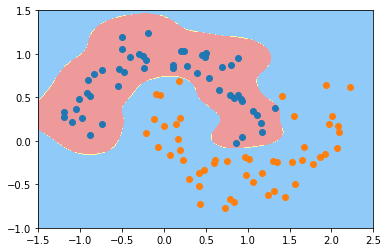

In [16]:
svc_gamma10 = RBFKerbelSVC(10)
svc_gamma10.fit(X, y)

plot_decision_boundary(svc_gamma10, [-1.5,2.5,-1,1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

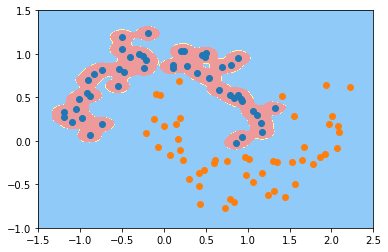

In [17]:
svc_gamma100 = RBFKerbelSVC(100)
svc_gamma100.fit(X, y)

plot_decision_boundary(svc_gamma100, [-1.5,2.5,-1,1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

可以看到，gamma取值越大，模型越复杂，会导致过拟合，过小会导致欠拟合